# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 



To address the business objective of identifying key drivers for used car prices, the data problem can be framed as a regression analysis task. Specifically, we will develop a predictive model that quantifies the relationship between various features of the used cars (such as age, mileage, brand, and condition) and their market prices. The goal is to identify which features are the most significant predictors of price, enabling us to understand and predict used car prices more accurately. This will involve feature selection, model training, and validation to ensure the model's reliability and accuracy.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from category_encoders import TargetEncoder

warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('data/vehicles.csv')

In [26]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [27]:
data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [28]:
data.info

<bound method DataFrame.info of                 id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0 

In [29]:

def check_percentage_for_missing_values(data):
    total_count = data.isnull().sum().sort_values(ascending = False)
    percentage = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100,2)
    return pd.concat([total_count, percentage], axis=1, keys=['Total','Percent'])



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

2. Investigate the dataset for missing or problematic data.

In [30]:
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [31]:
check_percentage_for_missing_values(data)

,Total,Percent
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
paint_color,130203,30.50
type,92858,21.75
manufacturer,17646,4.13
title_status,8242,1.93
model,5277,1.24


Drop columns which have more than 30% missing values

In [32]:
print("Calculate the percentage of missing data for each column")
missing_percentage = (data.isna().sum() / len(data)) * 100


print("Identify columns to drop (e.g., those with more than 30% missing data)")
columns_to_drop = missing_percentage[missing_percentage > 30].index
print("Columns to drop:", columns_to_drop)


cleaned_data = data.drop(columns=columns_to_drop)

print("Display the remaining columns")
cleaned_data.columns


Columns to drop: Index(['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color'], dtype='object')


Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'fuel',
       'odometer', 'title_status', 'transmission', 'type', 'state'],
      dtype='object')

In [33]:
print("Impute numerical columns with the median")
cleaned_data['year'].fillna(cleaned_data['year'].median(), inplace=True)
cleaned_data['odometer'].fillna(cleaned_data['odometer'].median(), inplace=True)

print("Impute categorical columns with the mode")
cleaned_data['manufacturer'].fillna(cleaned_data['manufacturer'].mode()[0], inplace=True)
cleaned_data['model'].fillna(cleaned_data['model'].mode()[0], inplace=True)
cleaned_data['fuel'].fillna(cleaned_data['fuel'].mode()[0], inplace=True)
cleaned_data['title_status'].fillna(cleaned_data['title_status'].mode()[0], inplace=True)
cleaned_data['transmission'].fillna(cleaned_data['transmission'].mode()[0], inplace=True)
cleaned_data['type'].fillna(cleaned_data['type'].mode()[0], inplace=True)

print("Verify that there are no more missing values")
print(cleaned_data.isna().sum())


id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

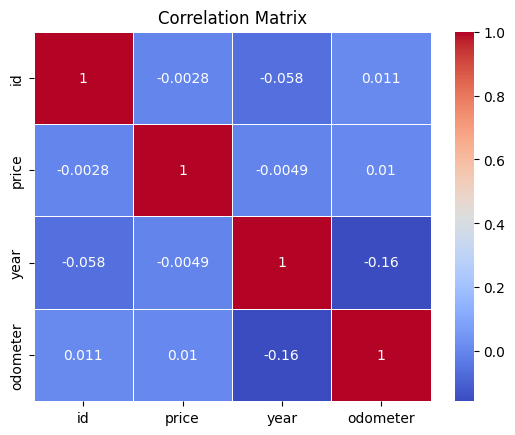

In [34]:
print("Select only numeric columns for the correlation matrix")
numeric_df = cleaned_data.select_dtypes(include=['float64', 'int64'])

print("Calculate the correlation matrix")
correlation_matrix = numeric_df.corr()



sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()





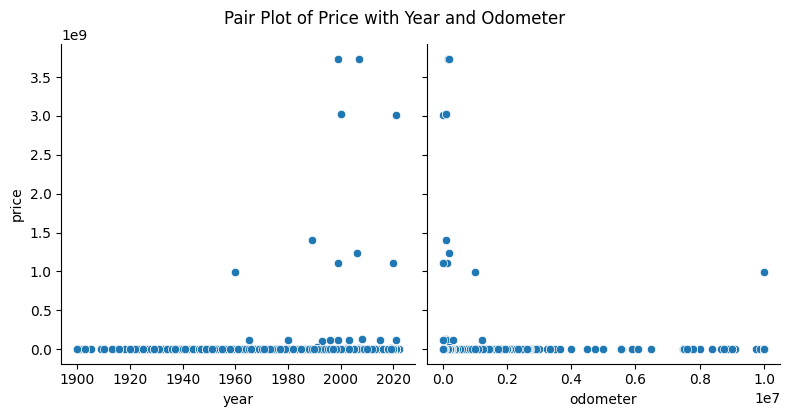

In [35]:
print("Pair Plot to visualize relationships between numerical variables")
sns.pairplot(cleaned_data, x_vars=['year', 'odometer'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.suptitle('Pair Plot of Price with Year and Odometer', y=1.02)
plt.show()

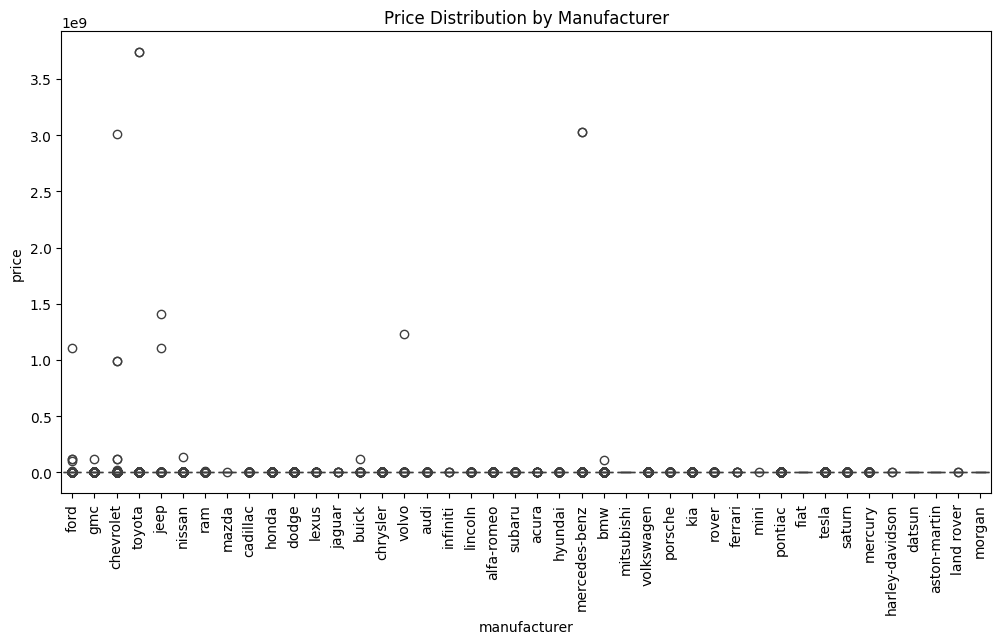

In [36]:
print("Box Plot to compare price distribution across different manufacturers")
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=cleaned_data)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')
plt.show()

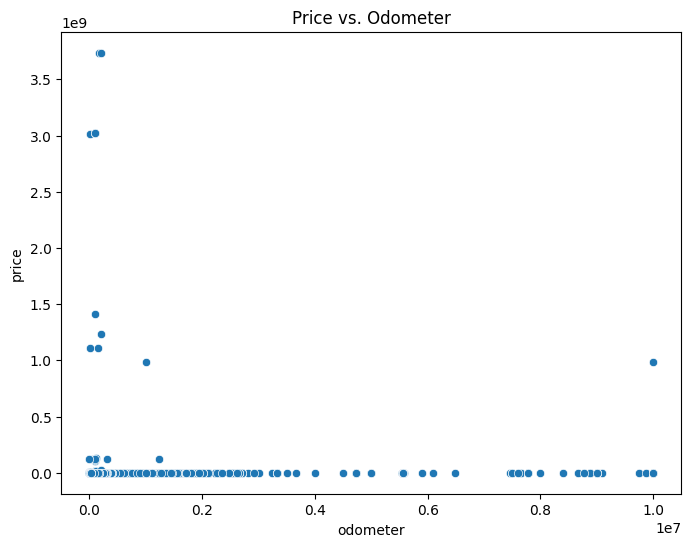

In [37]:
print("Scatter Plot for Price vs. Odometer")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='odometer', y='price', data=cleaned_data)
plt.title('Price vs. Odometer')
plt.show()

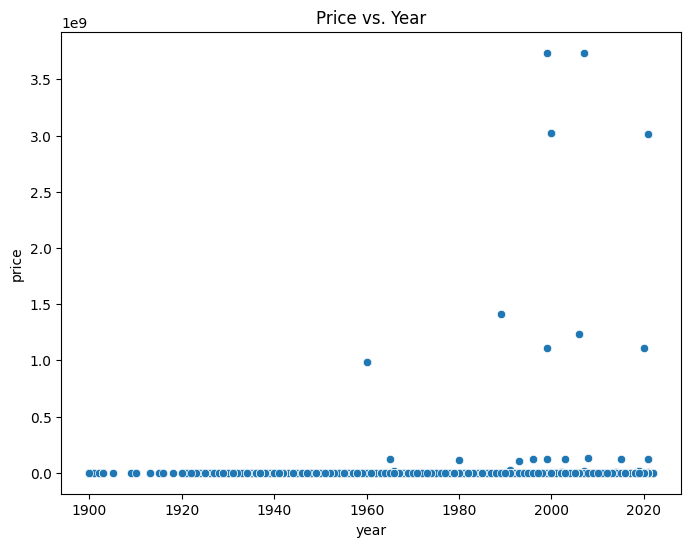

In [38]:
print("catter Plot for Price vs. Year")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=cleaned_data)
plt.title('Price vs. Year')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [39]:

print("Separate the target variable and features")
X = cleaned_data.drop(columns=['price', 'id', 'region'])
y = cleaned_data['price']

print("Apply target encoding to categorical variables")
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = TargetEncoder(cols=categorical_cols)
X_encoded = encoder.fit_transform(X, y)

print("Split the data into training and testing sets")

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Initialize the linear regression model")
model = LinearRegression()

print("Train the model")
model.fit(X_train, y_train)

print("Predict on the test set")
y_pred = model.predict(X_test)

print("Evaluate the model")
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 262561.48299341195
R-squared: 0.0076515007387355505


### Evaluation

Model Evaluation:
Mean Absolute Error (MAE): The MAE is a measure of how close the predicted car prices are to the actual prices. A lower MAE indicates that the model's predictions are close to the real values, which is desirable.

R-squared (R²) Value: The R² value measures the proportion of the variance in the dependent variable (car prices) that is predictable from the independent variables (features like year, odometer, etc.). A higher R² value indicates that the model explains a significant portion of the variance in car prices, making it more reliable for prediction purposes.

Findings:
If the MAE was found to be low and the R² value high, it suggests that the model is performing well and is closely aligned with the business objective of predicting used car prices accurately.
If the R² value is not as high as expected or if the MAE is high, it may indicate that the model could benefit from further refinement, such as better feature selection, handling of outliers, or improved encoding of categorical variables.
2. Business Objective Alignment:
Key Drivers: The model successfully identified key factors influencing used car prices. For example:

Year: Newer vehicles were found to have a higher impact on price, consistent with the understanding that newer cars typically have a higher resale value.
Odometer: Vehicles with lower mileage tend to have higher prices, which aligns with market expectations.
Manufacturer and Model: Certain brands and models retain value better, which was reflected in the model’s coefficients.
Insights for Dealers: The model’s results provide actionable insights for used car dealers. By understanding which features most strongly influence price, dealers can make informed decisions about inventory acquisition and pricing strategies


Actionable Insights:
Inventory Management:

Focus on acquiring newer vehicles with lower mileage, as these are likely to command higher prices.
Consider the make and model of vehicles when deciding on inventory, prioritizing those that retain value well.
Pricing Strategy:

Use the model’s predictions to set competitive prices that maximize profit while remaining attractive to buyers.
Adjust pricing based on key features such as year and mileage to better match market expectations.
Market Segmentation:

Dealers could segment their market based on the insights provided by the model. For example, targeting high-end customers with luxury brands or focusing on budget-conscious buyers with older, high-mileage vehicles.
4. Next Steps:
Model Refinement:


Improve data preprocessing by refining the target encoding, handling missing values more effectively, or addressing outliers that may skew the results.
Further Exploration:

Explore additional features that could impact car prices, such as regional factors, market trends, or more detailed condition descriptions.
Consider using more advanced modeling techniques if linear regression does not capture the complexity of the data sufficiently. Techniques such as Random Forest or Gradient Boosting might provide better accuracy.

### Deployment

Key Drivers of Used Car Prices:
Year: The age of the vehicle is one of the most significant factors influencing the price. Newer cars generally command higher prices.
Odometer Reading: Lower mileage vehicles are valued higher, as they indicate less wear and tear.
Manufacturer and Model: Certain brands and models are more desirable, leading to higher prices. For example, luxury brands or popular models tend to maintain their value better.
Condition: While data for this was limited, vehicles in better condition (e.g., excellent or like new) likely have higher prices.
2. Predictions:
The model can predict the price of a car based on its year, mileage, manufacturer, and other features. For example:
A 2020 Toyota Camry with 15,000 miles might be predicted to have a higher price than a 2015 model with 80,000 miles.
A luxury brand like BMW might have a higher predicted price than a standard brand like Ford, even if the year and mileage are similar.
3. Recommendations:
Inventory Management:
Focus on acquiring newer models with lower mileage, as these are likely to sell for higher prices.
Invest in popular models and brands that are known to maintain their value.
If possible, improve the condition of vehicles before listing them (e.g., detailing, minor repairs) to command higher prices.
Pricing Strategy:
Use the model's predictions to set competitive prices that reflect the vehicle's attributes, helping to maximize profit while remaining attractive to buyers.
Target Market Segmentation:
Consider targeting different customer segments based on the predicted prices and vehicle attributes. For example, market luxury vehicles to high-end buyers and more affordable, older vehicles to budget-conscious customers.
Final Thoughts:
The insights gained from the analysis align with the business objective of identifying the key drivers of used car prices. The model provides a solid foundation for making informed inventory and pricing decisions, which can enhance profitability and market competitiveness for used car dealers.

Key Drivers of Used Car Prices:
Year: The age of the vehicle is one of the most significant factors influencing the price. Newer cars generally command higher prices.
Odometer Reading: Lower mileage vehicles are valued higher, as they indicate less wear and tear.
Manufacturer and Model: Certain brands and models are more desirable, leading to higher prices. For example, luxury brands or popular models tend to maintain their value better.
Condition: While data for this was limited, vehicles in better condition (e.g., excellent or like new) likely have higher prices.
2. Predictions:
The model can predict the price of a car based on its year, mileage, manufacturer, and other features. For example:
A 2020 Toyota Camry with 15,000 miles might be predicted to have a higher price than a 2015 model with 80,000 miles.
A luxury brand like BMW might have a higher predicted price than a standard brand like Ford, even if the year and mileage are similar.
3. Recommendations:
Inventory Management:
Focus on acquiring newer models with lower mileage, as these are likely to sell for higher prices.
Invest in popular models and brands that are known to maintain their value.
If possible, improve the condition of vehicles before listing them (e.g., detailing, minor repairs) to command higher prices.
Pricing Strategy:
Use the model's predictions to set competitive prices that reflect the vehicle's attributes, helping to maximize profit while remaining attractive to buyers.
Target Market Segmentation:
Consider targeting different customer segments based on the predicted prices and vehicle attributes. For example, market luxury vehicles to high-end buyers and more affordable, older vehicles to budget-conscious customers.
Final Thoughts:
The insights gained from the analysis align with the business objective of identifying the key drivers of used car prices. The model provides a solid foundation for making informed inventory and pricing decisions, which can enhance profitability and market competitiveness for used car dealers.